# Формирование модели монетизации

__Задачи__:

Необходимо сформировать модель монетизации игрового приложения на основе рекламы с учетом следующих рисков:
- пользователи будут уходить, в случае если начать показывать раньше рекламу до того момента как его игра затянет;
- чем позже создатели игры включат рекламу тем больше доходов они потеряют. 

__Цель исследования:__ выбор оптимального времени для запуска рекламы на основе расчета ее окупаемости при разных сценариях исходя из расходов на ее продвижение. 

Для достижения цели нам необходимо выполнить следующий порядок:
- Провести исследовательский анализ данных;
- Проанализировать влияние событий на совершение целевого события;
- Проверить статистические гипотезы.

__Выполненные задачи в рамках проекта:__ <br>
- подготовлены данные для анализа;
- построены диаграмму по количеству построенных объектов и гистограмму по количеству событий по дате и времени? отбросили ненужные данные;
- рассчитаны средний CAC на одного покупателя для каждого источника трафика;
- проведен когортный анализ для расчета Retention Rate;
- расчитан на основе lifetime когорты время, которое затрачивает пользователь, по событиям;
- проверена гипотеза о времени прохождения уровня между пользователями;
- подготовлены выводы по возможности монетизации проекта.

### Содержание
<ul style="list-style:none; text-decoration: none">
    <li><a style="text-decoration: none" href="#introduction">1. Изучение общей информации</a></li>
    <li><a style="text-decoration: none" href="#data_pre-processing">2. Подготовка данных для анализа</a></li>
    <li><a style="text-decoration: none" href="#analysis">3. Изучение и проверка данных</a></li>
    <li><a style="text-decoration: none" href="#research_analysis">4. Анализ данных</a></li>
    <li><a style="text-decoration: none" href="#hypothesis_testing">5. Проверка гипотез</a></li>
    <li><a style="text-decoration: none" href="#conclusion">6. Выводы</a></li>
</ul>

# Материалы к проекту
Презентация: https://drive.google.com/file/d/1Dhzs9zeYNk2lOVkWqUAgfA55IIBSnIMi/view?usp=sharing
Дашборд: https://public.tableau.com/app/profile/sibvlad/viz/FinalProject_16259154177400/Dashboard1
https://public.tableau.com/app/profile/sibvlad/viz/FinalProject1_16259161686310/Dashboard2

## 1. Изучение общей информации <a name="introduction"></a> 

In [1]:
#Импортирую библиотеку
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Импортирую библиотеку Pandas и с помощью метода .read_csv() создаю новые DataFrame __mobile_dataset__ и __mobile_soures__.

In [2]:
user_source = pd.read_csv('user_source.csv')
ad_costs = pd.read_csv('ad_costs.csv')
game_actions = pd.read_csv('game_actions.csv')

In [3]:
#пропишем функцию для получения основной информации о датафрейме
def dataDescribe(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()
    
#запускаем функцию
for dataframe in [user_source, ad_costs, game_actions]:
    dataDescribe(dataframe)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


,user_id,source
count,13576,13576
unique,13576,4
top,dbd07c7f-799d-4c93-a9cb-b5deaf264576,yandex_direct
freq,1,4817


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN


,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-04 04:02:30,building,spaceport,bf542075-e3a2-4e79-82d8-3838e86d2a25,satellite_orbital_assembly
freq,4,127957,59325,22,1866


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Получаем следующую структуру таблицы __``user_source``__:
 
* Количество столбцов: __3__
* Количество строк: __13576__
* Тип данных в столбцах: __object(2)__

Получаем следующую структуру таблицы __``ad_costs``__:
* Количество столбцов: __2__
* Количество строк: __13576__
* Тип данных в столбцах: __float64(1)__, __object(2)__

Получаем следующую структуру таблицы __``game_actions``__:
* Количество столбцов: __5__
* Количество строк: __135640__
* Тип данных в столбцах: __object(5)__

В <code>game_actions.csv</code> существуют следующие колонки:<br>
- <code>event_datetime</code> — время события;
-<code>event</code> — одно из трех событий:
<br>

1. <code>building</code> — объект построен,<br>
2. <code>finished_stage_1</code> — первый уровень завершён,<br>
3. <code>project</code> — проект завершён;<br>

- <code>building_type</code> — один из трёх типов здания:
1. <code>assembly_shop</code> — сборочный цех,<br>
2. <code>spaceport</code> — космопорт,<br>
3. <code>research_center</code> — исследовательский центр;<br>
- <code>user_id</code> — идентификатор пользователя;
- <code>project_type</code> — тип реализованного проекта.

Датасет <code>ad_cost.csv</code> содержит колонки:<br>
- <code>day</code> - день, в который был совершен клик по объявлению<br>
- <code>source</code> - источник трафика<br>
- <code>cost</code> - стоимость кликов<br>

Датасет <code>user_source.csv</code> содержит колонки:<br>
- <code>user_id</code> - идентификатор пользователя<br>
- <code>source</code> - источников, с которого пришёл пользователь, установивший приложение<br>

## 2.  Подготовка данных для анализа  <a name="data_pre-processing"></a>

В данном блоке проведем следующую работу:

- приведем данные данные к нужным типам;
- удалим дубликаты, если они имеются;
- проведем работу с пропусками при их наличии;
- исправим ошибки в данных. То есть в данном этапе подгатавливаем данные к анализу.

In [4]:
print('\nНаличие дубликатов в данных "user_source": {}\n'.format(user_source.duplicated().sum()))
print('\nНаличие дубликатов в данных "ad_costs": {}\n'.format(ad_costs.duplicated().sum()))
print('\nНаличие дубликатов в данных "game_actions": {}\n'.format(game_actions.duplicated().sum()))


Наличие дубликатов в данных "user_source": 0


Наличие дубликатов в данных "ad_costs": 0


Наличие дубликатов в данных "game_actions": 1



Удаляем дубликаты в датафрейме game_actions

In [5]:
game_actions = game_actions.drop_duplicates().reset_index(drop=True) 
#Проверяем снова на дубликаты датафрейм game_actions
print('\nНаличие дубликатов в данных "game_actions": {}\n'.format(game_actions.duplicated().sum()))


Наличие дубликатов в данных "game_actions": 0



Переведем столбец __'day'__ в датафрейме __ad_costs__  в другой тип данных, из объекта в дату.

In [6]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'], unit='ns')
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


Переведем столбец __'event_datetime'__ в датафрейме __game_actions__  в другой тип данных, из объекта в дату.

In [7]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], unit='ns')
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


Поработаем с пропусками в датафрейме __game_actions__

In [8]:
for i in ['building_type', 'project_type']:
    game_actions[i] = game_actions[i].fillna('no_informations') 
    print('Пропущенные значения в столбце {}: {}\n'.format(i, game_actions[i].isnull().sum()))

Пропущенные значения в столбце building_type: 0

Пропущенные значения в столбце project_type: 0



__Выводы:__
Данные подготовлены к работе для анализа. Так в датафрейме __game_actions__ у нас были заменены все пропущенные значения в столбцах 'building_type', 'project_type', а также удалены дубликаты. Переведен столбец __'day'__ в датафрейме __ad_costs__  и столбец __'event_datetime'__ в датафрейме __game_actions__ в другой тип данных, из объекта в дату.

## 3. Изучение и проверка данных <a name="analysis"></a> 

Построим диаграмму распределения количества построенных объектов. Для этого сгруппируем __building_type__ по  __user_id__ по количеству и по уникальным показателем, а затем найдем среднее значение построенных объектов и посчитаем процент по количеству построенных объектов и по количеству построенных уникальных объектов. Наиболее популярными объектами выступаем тип постройки __spaceport__ (43,7% в общем доли построенных объектов)  и __assembly_shop__ (40,2% в общем доли построенных объектов). В среднем данные типы постройки строят чуть более 4 раз. Тип __research_center__ пользуется меньшей популярностью.

In [9]:
#Группируем из датафрейма game_actions по количеству построенных объектов
buildingCount = game_actions.groupby('building_type')['user_id'].agg(['count', 'nunique']).reset_index().sort_values(by='count', ascending=False)
#Посчитаем среднее значение построенных объектов
buildingCount['averageNumberBuilding'] = (buildingCount['count'] / buildingCount['nunique']).round(2)
#Посчитаем процент по количеству построенных объектов
buildingCount['percentCount'] = (buildingCount['count'] / buildingCount['count'].sum()*100).round(1).astype('str')+'%'
#Посчитаем процент по количеству построенных уникальных объектов
buildingCount['percentNunique'] = (buildingCount['nunique'] / buildingCount['nunique'].sum()*100).round(1).astype('str')+'%'
#Выведем данные
print(buildingCount)

     building_type  count  nunique  averageNumberBuilding percentCount  \
3        spaceport  59325    13231                   4.48        43.7%   
0    assembly_shop  54494    13576                   4.01        40.2%   
2  research_center  14137     7671                   1.84        10.4%   
1  no_informations   7683     5817                   1.32         5.7%   

  percentNunique  
3          32.8%  
0          33.7%  
2          19.0%  
1          14.4%  


In [10]:
game_actions['building_type'].count()

135639

Строим функцию, которая нам будет строить диаграммы с процентами по каждому значению

In [11]:
#Построим функцию, котрая будет строить диаграммы
def doBar(data, x, y, title, percent):
    fig = px.bar(data, x=x, y=y, text=y, color=x)
    fig.update_layout(
    title = title  + y,
    yaxis_title="Количество")
    #прописываем проценты по каждому значению
    for trace, percent in zip(fig.data, data[percent]):
        trace.name = trace.name.split('=')[0] + ' (' + percent+ ')';
    
    fig.show(renderer='svg')

В принципе построенные диаграммы показывают, что самыми популярными построенными объектами выступаем __spaceport__ и __assembly_shop__. Первый график показывает, сколько всего объектов было построено, а второй график показывает, сколько было построено уникальными пользователями.

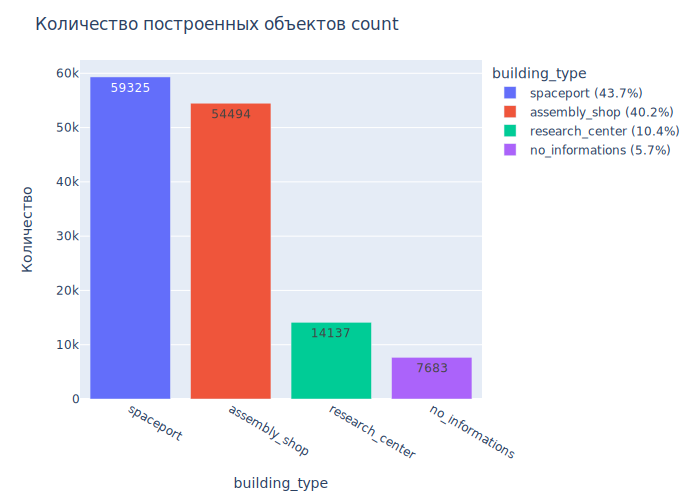

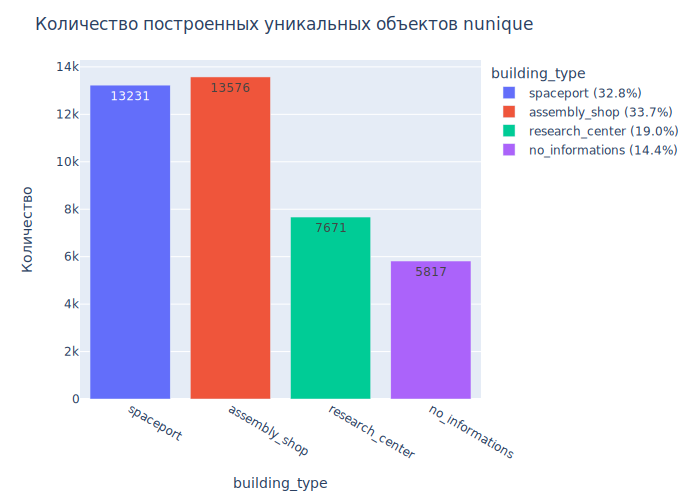

In [12]:
#Прорисовываем функцию
doBar(buildingCount, 'building_type', 'count', "Количество построенных объектов ", 'percentCount')
doBar(buildingCount, 'building_type', 'nunique', "Количество построенных уникальных объектов ", 'percentNunique')

Расмотрим долю людей прошедших первых этап в разрезе построенных объектов. Построено 127 тыс. объектов 13,5 пользователями.

In [13]:
eventCount = game_actions.groupby('event')['user_id'].agg(['count', 'nunique']).reset_index().sort_values(by='count', ascending=False)
print(eventCount)
print('')
print('')
print('Доля, кто дошел до первого уровня составляет {:.2%}'.format((eventCount.loc[1, 'nunique']/ eventCount.loc[0, 'nunique'])))
print('Доля, кто дошел до реализации проекта составляет {:.2%}'.format((eventCount.loc[2, 'nunique']/ eventCount.loc[0, 'nunique'])))

              event   count  nunique
0          building  127956    13576
1  finished_stage_1    5817     5817
2           project    1866     1866


Доля, кто дошел до первого уровня составляет 42.85%
Доля, кто дошел до реализации проекта составляет 13.74%


Построим гистограмму по количеству событий по дате и времени. На основе данных можно сделать вывод, что всплеск наблюдался только до 10 мая, затем произошло падение. Необходимо в дальнейшем проанализировать причины падения количество пользователей. При это до 10 мая наблюдался значительный рост.

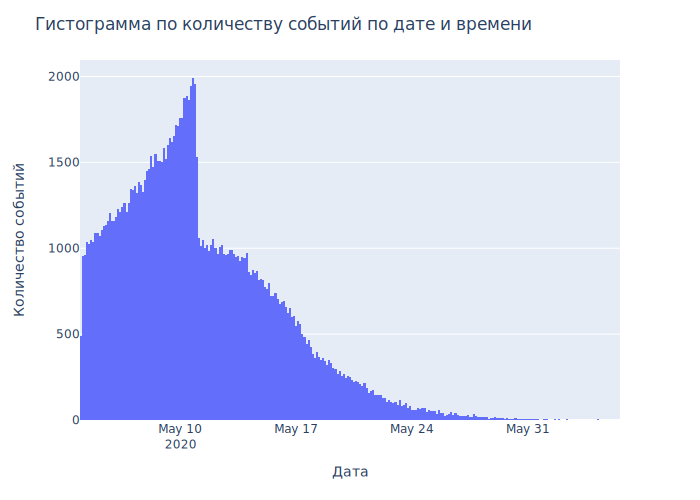

In [14]:
#Группириуем данные по дате 
eventNumberCount = game_actions.groupby('event_datetime').agg({'event': 'count'}).reset_index()

#Строим гистограмму
fig = px.histogram(eventNumberCount, x="event_datetime", y="event")
fig.update_layout(
    title = 'Гистограмма по количеству событий по дате и времени',
    xaxis_title="Дата",
    yaxis_title="Количество событий")
fig.show(renderer='svg')

Теперь перейдем к анализу ресурсов, для этого мы сгруппируем данные по ресурсам по их количеству. Построим для этого график. На основе полученных данных можно говорить, что наиболее популярными источниками, по которому люди переходят в игру являются yandex_direct (35,5% от общей доли источников) и инстаграм (24,7% от общей доли источников).

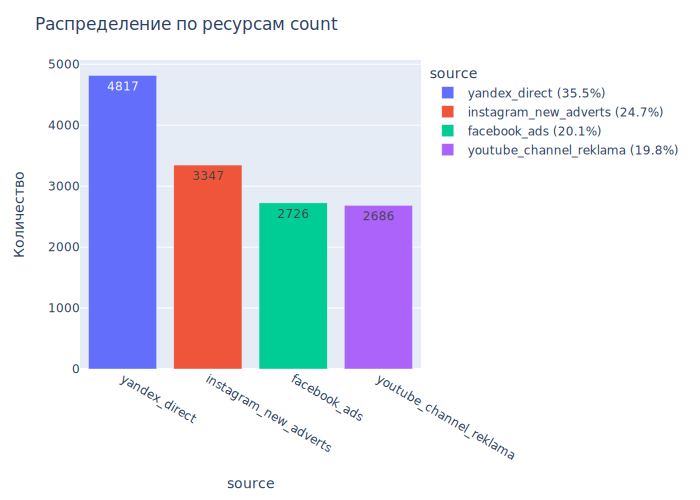

In [15]:
sourceCount = user_source.groupby('source')['user_id'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
sourceCount['percent'] = (sourceCount['count'] / sourceCount['count'].sum()*100).round(1).astype('str')+'%'

doBar(sourceCount, 'source', 'count', "Распределение по ресурсам ", 'percent')

__Выводы:__
- Наиболее популярными объектами выступаем тип постройки __spaceport__ (43,7% в общем доли построенных объектов)  и __assembly_shop__ (40,2% в общем доли построенных объектов). В среднем данные типы постройки строят чуть более 4 раз.
- Доля, кто дошел до первого уровня от общего количества пользователей составляет 42.85%, а доля, кто дошел до реализации проекта составляет 13.74%. То есть люди предпочитают убивать врага для прохождения уровня.
- Наиболее популярными источниками, по которому люди переходят в игру являются yandex_direct (35,5% от общей доли источников) и инстаграм (24,7% от общей доли источников).

## 4. Анализ данных <a name="research_analysis"></a> 

Проанализируем расходы по источникам.

In [16]:
cost_total = ad_costs['cost'].sum()
print('Общая сумма по источникам составила', cost_total)

Общая сумма по источникам составила 7603.576986788022


Построим график по распределению расходов по источникам. Наибольшие расходы приходятся на три источника: yandex_direct (2233), instagram (2161) и facebook (2140). 

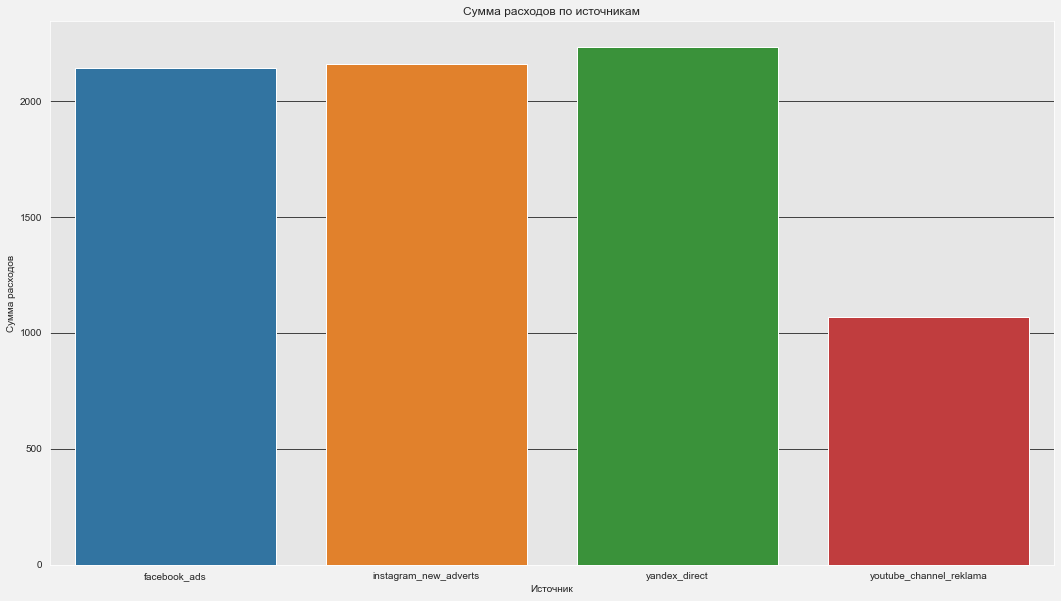

In [17]:
costs_source = ad_costs.groupby('source').sum().reset_index()
sns.set_style('darkgrid',#задаем стили графикам
            {'axes.facecolor': '0.9',
            'grid.color': '0.1',
            'figure.facecolor': '0.95'})
    
plt.figure(figsize=(18,10))
sns.barplot(data=costs_source, x='source', y='cost')
plt.title("Сумма расходов по источникам")
plt.xlabel("Источник")
plt.ylabel("Сумма расходов");

Рассчитаем средний CAC на одного покупателя для каждого источника трафика, для этого разделим стоимость на каждый источник на количество привлеченных клиентов. Самым дорогим источникам по CAC является Facebook (0,78) и instagram (0.64).

In [18]:
costSource = costs_source.merge(sourceCount, on='source')
costSource['cac'] = costSource['cost'] / costSource['count']
costSource

,source,cost,count,percent,cac
0,facebook_ads,2140.904643,2726,20.1%,0.785365
1,instagram_new_adverts,2161.441691,3347,24.7%,0.645785
2,yandex_direct,2233.111449,4817,35.5%,0.463590
3,youtube_channel_reklama,1068.119204,2686,19.8%,0.397662


Затем проведем когортный анализ, который позволит нам рассчитать Retention Rate.

Сгруппируем данные по столбцу __user_id__ методом groupby(). Для каждого пользователя получим дату его первого захода в игру — __'event_datetime'.min()__. Методом __merge()__ объединим датафрейм game_actions и Series first_date по столбцу __customer_id__.

In [19]:
#Группируем данные по столбцу __user_id__ методом groupby().
first_date = game_actions.groupby('user_id')[
    'event_datetime'
].min()

#Переименовываем столбец
first_date.name = 'first_event_date'

#Методом merge() объединим датафрейм game_actions и Series first_date по столбцу 'customer_id':
user_activity = game_actions.merge(first_date, on='user_id')

#Выделим из столбцов first_event_day и event_week дату без обозначения времени.
user_activity['first_event_day'] = user_activity['first_event_date'].astype(
    'datetime64[D]'
)

user_activity['event_week'] = user_activity['event_datetime'].astype('datetime64[D]')
print(user_activity.head(10)) 

       event_datetime     event  building_type  \
0 2020-05-04 00:00:01  building  assembly_shop   
1 2020-05-05 05:20:15  building  assembly_shop   
2 2020-05-05 19:24:02  building  assembly_shop   
3 2020-05-05 20:59:19  building  assembly_shop   
4 2020-05-06 00:52:56  building  assembly_shop   
5 2020-05-08 08:16:51  building  assembly_shop   
6 2020-05-10 20:27:01  building  assembly_shop   
7 2020-05-04 00:00:03  building  assembly_shop   
8 2020-05-06 23:49:25  building  assembly_shop   
9 2020-05-07 03:56:30  building      spaceport   

                                user_id     project_type    first_event_date  \
0  55e92310-cb8e-4754-b622-597e124b03de  no_informations 2020-05-04 00:00:01   
1  55e92310-cb8e-4754-b622-597e124b03de  no_informations 2020-05-04 00:00:01   
2  55e92310-cb8e-4754-b622-597e124b03de  no_informations 2020-05-04 00:00:01   
3  55e92310-cb8e-4754-b622-597e124b03de  no_informations 2020-05-04 00:00:01   
4  55e92310-cb8e-4754-b622-597e124b03de  no_infor

Когортой станет столбец __first_event_day__ — день, в котором был сделан первый заход в игру. Сгруппируем данные по этому столбцу и оценим показатели каждой когорты. Применим знакомый метод agg. Ему передают словарь, где ключи — названия столбцов, а значения — агрегирующие функции. Затем находим lifetime когорты, а именно из месяца входа в игру event_week вычитаем месяц когорты first_event_day. Сгруппируем данные по когорте и lifetime и  посчитаем для каждой когорты количество активных пользователей на определённую «неделю жизни». Затем найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю и объединим данные по когортам с исходным количеством пользователей в когорте. В заключении построим сводную таблицу и создадим тепловую карту.

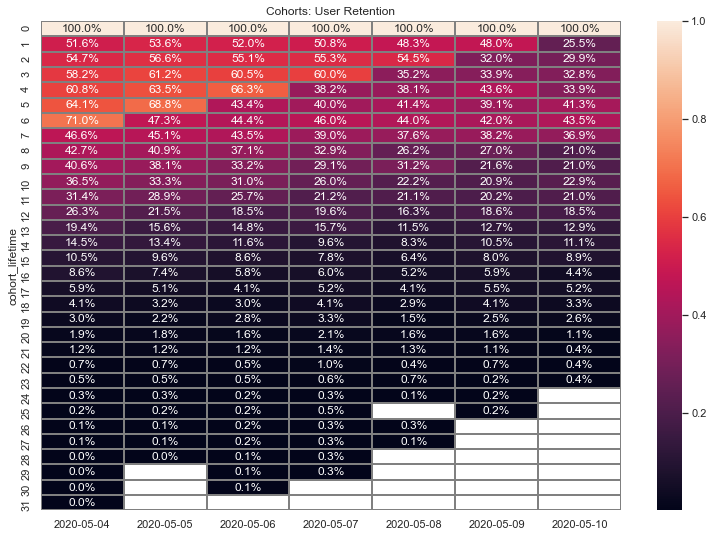

In [20]:
#Строим когорту
cohort_grouped = user_activity.groupby('first_event_day').agg(
    {'user_id': 'nunique'}
)

#Найдём lifetime когорты. Из месяца входа в игру event_week вычтем месяц когорты first_event_day
user_activity['cohort_lifetime'] = (
    user_activity['event_week']
    - user_activity['first_event_day']
)

#Преобразуем этот тип в дни, прошедших между датами. Огруглим до целого число
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1, 'D')

user_activity['cohort_lifetime'] = (
    user_activity['cohort_lifetime'].round().astype('int')
)

#Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённую «неделю жизни»
cohorts = user_activity.groupby(['first_event_day','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 

#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_event_day', 'user_id']
]

#Переименуем столбец
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'}) 

#Объединим данные по когортам с исходным количеством пользователей в когорте.
cohorts = cohorts.merge(initial_users_count,on='first_event_day')

#Рассчитаем Retention Rate
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users'] 

#Построим сводную таблицу и создадим тепловую карту
retention_pivot = cohorts.pivot_table(
    index='cohort_lifetime',
    columns='first_event_day',
    values='retention',
    aggfunc='sum',
) 


sns.set(style='white')
plt.figure(figsize=(13, 9))
retention_pivot.columns = [str(x)[0:10] for x in retention_pivot.columns]
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

__Вывод по когортном анализу__: на основе когортного анализа можно сделать вывод, что после посещения первого раза, где-то около 50% происходит падение по пользователям. В целом как правило большая часть людей возвращается на третий четвертый день. В целом показатели активности снижается после 10 дней, то есть или человек проходит первый уровень или он остывает к игре.

На основе lifetime когорты рассчитаем сколько времени тратят пользователь по событиям. Для этого построим функцию, которая будет строить диаграмму распределения по событиям.

In [21]:
#Сделаем функцию, которая будет строить диаграмму распределения по событиям.
def doEvent(event):
    filtered_events = user_activity[user_activity['event'] == event]
    filtre_event = filtered_events.groupby('cohort_lifetime')['user_id'].agg('count').reset_index()
    sns.set_style('darkgrid',#задаем стили графикам
            {'axes.facecolor': '0.9',
            'grid.color': '0.1',
            'figure.facecolor': '0.95'})
    
    plt.figure(figsize=(18,10))
    sns.barplot(data=filtre_event, x='cohort_lifetime', y='user_id')
    plt.title("Распределение по событию " + event)
    plt.xlabel("Когорта")
    plt.ylabel("Частота");  
    plt.show()

Применим данную функцию

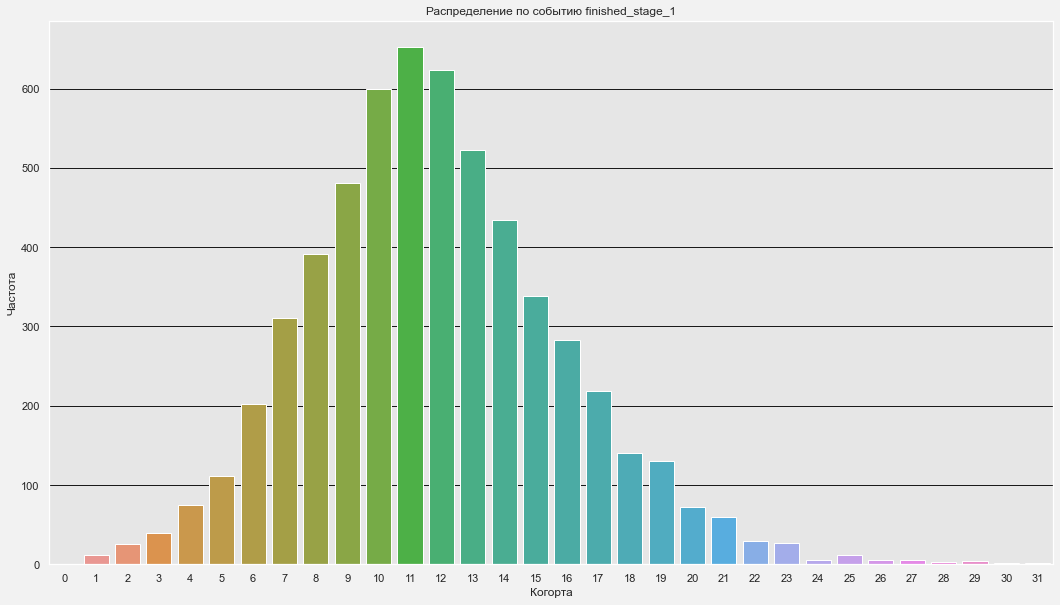

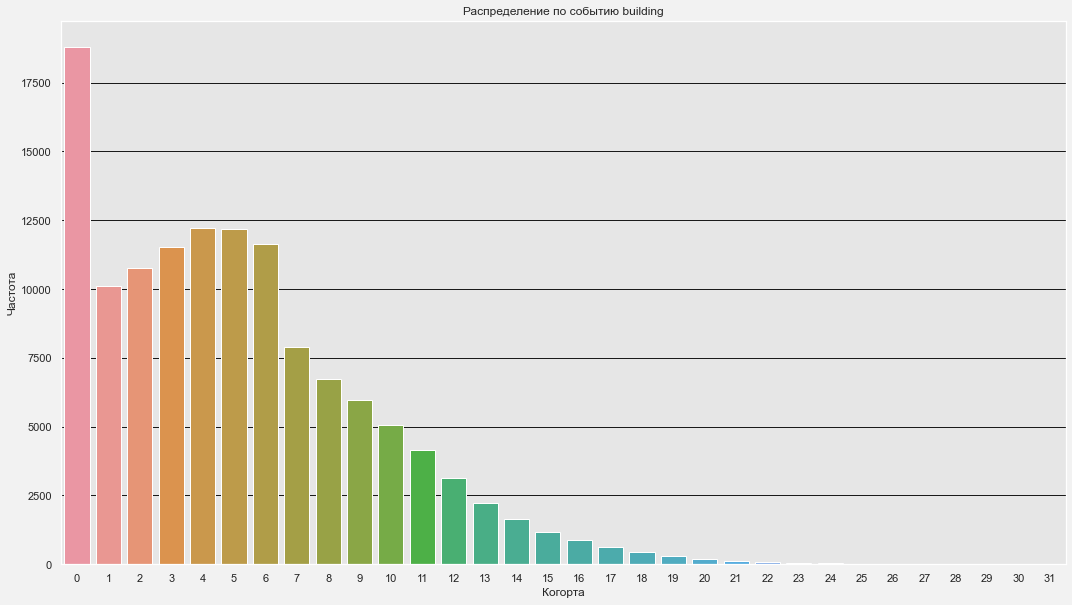

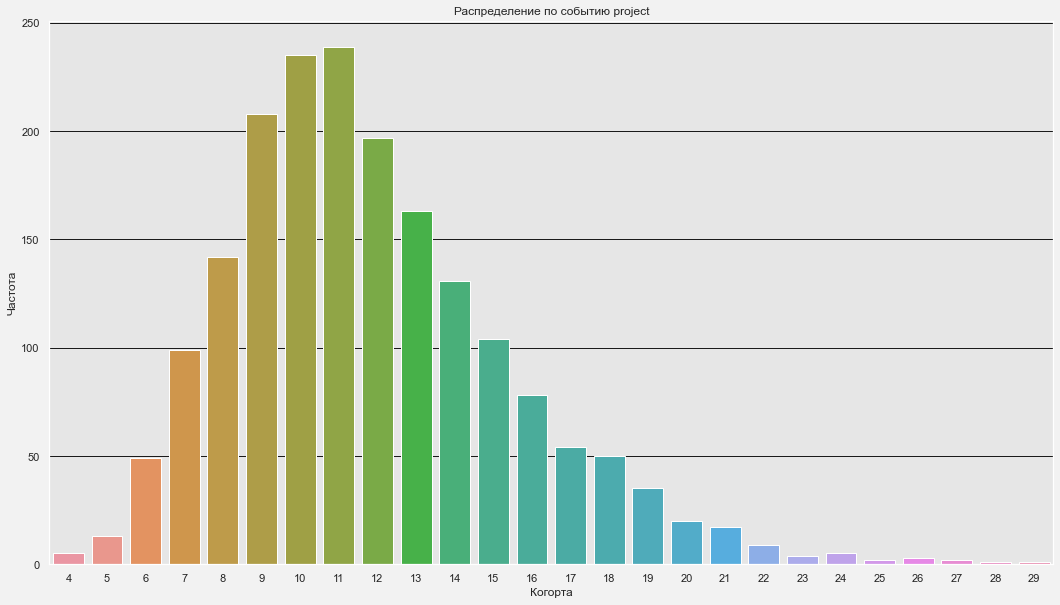

In [22]:
for event in ['finished_stage_1', 'building', 'project']:
    doEvent(event)

__Выводы по распределению событий.__<br>
На основе полученных диаграмм можно сделать следующие выводы: 
- больше всего объектов строится в первый день, затем всплеск по строительству объектов приходится на 4 или 5 день;
- проект реализовывают как правило на 10 или 11 день;
- первый уровень завершают на 11 или 12 день пользования игрой.

На основе полученных данных с нашей точки зрения необходимо включать рекламу на третий или четвертый день пользования рекламой, так как именно в эти дни происходит привыкание к игре и увеличивается активность ее пользованием. 

##  5. Проверка гипотез <a name="hypothesis_testing"></a> 

Для того, чтобы между собой проверить гипотезы мы проверяем распределение данных с помощью построения трех графиков, которые нам могут показать нормально ли распределяются данные. Для это мы построим функцию. 

In [23]:
#Сделаем функцию которая отобразит нужное количество корзин
def my_bins(df,value):
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return 100
    elif df[value].max() > 1000:
        return 200
    else: return 20

#Сделаем функцию которая будет нам отображать три графика    
def my_hist(df, col):
    coef_bins = 0.005
    X_1 = df.loc[(df[col] >= df[col].quantile(.01))&(df[col] <= df[col].quantile(.99)),col]
    plt.figure(figsize =(6, 4))
    hist = X_1.plot(#Первый график
                kind='hist',
                bins=my_bins(df, col),
                alpha=0.5,
                ec='black',
                color='green',
    )
    X_1.plot(kind='kde', color='g')
    plt.axvline(x=X_1.median(),#Медиана
                linewidth=3,
                color='red',
                linestyle='--')
    plt.axvline(x=X_1.mean(),#Среднее
                linewidth=3,
                color='b',
                linestyle=':')
    plt.axvline(x=X_1.quantile(.05),#Квантиль 5%
                linewidth=3,
                color='y',
                linestyle='--')
    plt.axvline(x=X_1.quantile(.95),#Квантиль 95%
                linewidth=3,
                color='y',
                linestyle='--')
    plt.xlim(df[col].quantile(.01), df[col].quantile(.99))
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    plt.figure(figsize =(6, 4))
    X_1.plot(kind='kde',#Второй график
    alpha=0.5,
    color='green',
    )
    plt.xlim(df[col].quantile(.01), df[col].quantile(.99))
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    #Проверка на нормальность распределения;
    from statsmodels.graphics.gofplots import qqplot
    qqplot(df[col], line='s')
    plt.title('Близость к нормальному распределению (красная линия)', fontsize=12, color='black')
    plt.show()
    print('--------------------------------------------------------------')

Разделим данные по тем, кто прошел первый уровень, убив врага и тем, кто рнализовал проект. Построим графики распределение на нормальность данных. На основе построенных графиков распределения можно сделать вывод, что распределение является ненормальным по двум полученным данным. 

In [24]:
#создаем данные по тем кто прошел первый уровень
gameFinish = user_activity.query('event=="finished_stage_1"')[['user_id', 'event', 'cohort_lifetime']]

#создаем данные по тем кто завершил проект
gameProject = user_activity.query('event=="project"')[['user_id', 'event', 'cohort_lifetime']]
 
#объединяем эти данные для того, чтобы понять кто закончил проект и прошел первый этап и тех кто прошел проект, убив врага.
gameMerge = gameFinish.merge(gameProject, on='user_id', how='outer')

#Заменим пропущенные значения
gameMerge['event_y'] = gameMerge['event_y'].fillna('no_project') 

#Сделаем срез только по людям кто прошел первый этап
gameFinishedStage = gameMerge.query('event_y=="no_project"')[['user_id', 'event_x', 'cohort_lifetime_x']]
#Переимоновываем ячейки
gameFinishedStage.rename(columns={'event_x': 'event', 'cohort_lifetime_x': 'cohort_lifetime'}, inplace=True)

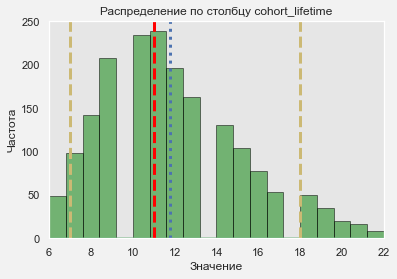

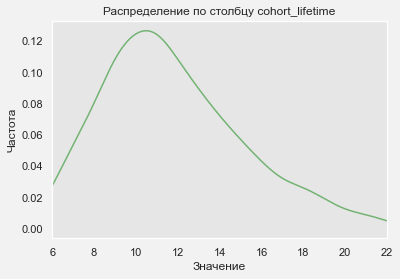

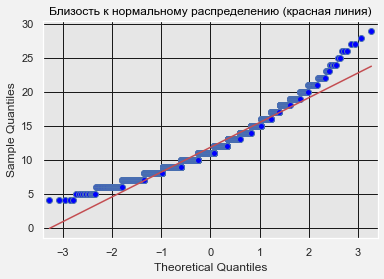

--------------------------------------------------------------


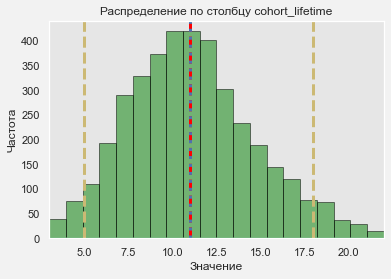

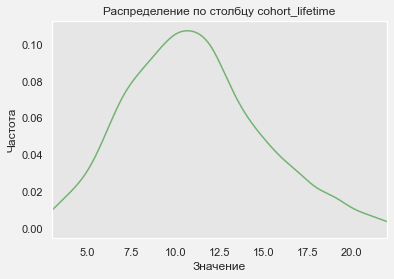

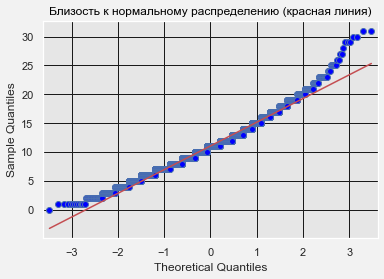

--------------------------------------------------------------


In [25]:
my_hist(gameProject, "cohort_lifetime")
my_hist(gameFinishedStage, "cohort_lifetime")

Проведем тест Шапиро-Уилка, где<br> 
<b>H0</b> - данные распределены нормально<br>
<b>H1</b> - данные распределены не нормально<br>
Исходя из полученных данных можем сделать вывод что данные распределены не нормально

In [26]:
alpha = 0.05
statistic, pvalue = st.shapiro(gameProject["cohort_lifetime"])
print('p-значение:', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.337791658304978e-24
Отвергаем нулевую гипотезу


Также можем проверить дисперсию вручную, если разница меньше 5% - дисперсии считаем равными, и наоборот.<br>
На основе полученных данных дисперсии являются не равными.

In [27]:
def var_pr(df1, df2):
    x = round(df1.var()/df2.var()*100)
    if x >= 5:
        return False
    else:
        return True
    
var_pr(gameProject["cohort_lifetime"], gameFinishedStage["cohort_lifetime"]) 

False

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: <b>st.ttest_ind()</b>. При этом так как данные распределены не нормально, то установим <b>equal_var = False</b>, то есть считаем дисперсию наших двух выборок не равной. Этот аргумент <b>equal_var = false</b> делает этот конкретный вызов t-критерия равным t-критерию Уэлча.<br> 

<b>H0</b> - время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком не различается.<br>
<b>H1</b> - время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком  различается.<br>    
</div>

In [28]:
alpha = .05# критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    gameFinishedStage["cohort_lifetime"], 
    gameProject["cohort_lifetime"],
    equal_var = False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.51887969232864e-13
Отвергаем нулевую гипотезу


Полученное p-значение находится на довольно таки высоком уровне, что говорит о том, что мы не отбрасываем нулевую гипотезу. То есть предполагаем, что время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком статистически значимо не отличаются.

Проверим еще одну гипотезу, а именно отличается ли количество построек от стратегии. Для этого с помощью метода __pivot_table()__ посчитаем сколько построек построил каждый пользователь, а затем разделим таблицы на тех кто убил врага и на тех, кто реализовал проект.

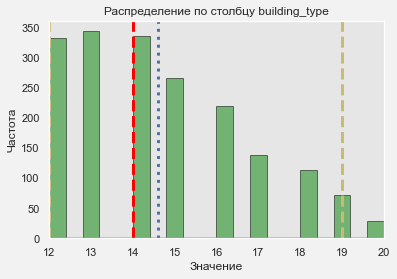

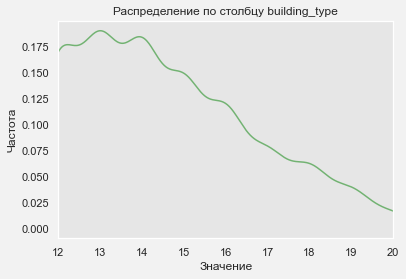

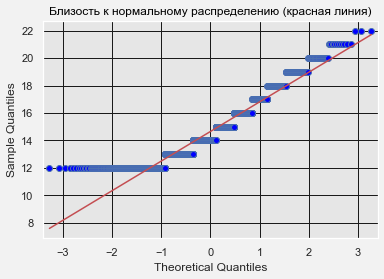

--------------------------------------------------------------


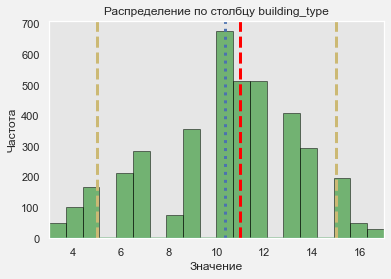

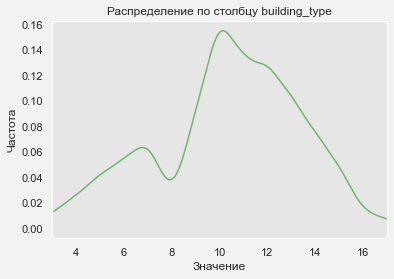

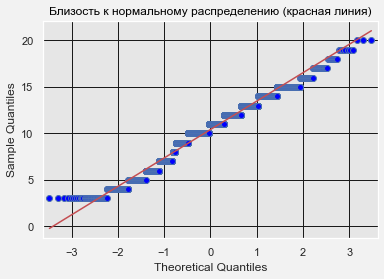

--------------------------------------------------------------


In [29]:
gamePivotTable = user_activity.pivot_table(index='user_id', values='building_type', aggfunc='count')
buildingProject = gameProject.merge(gamePivotTable, on='user_id')
buildingFinishedProject = gameFinishedStage.merge(gamePivotTable, on='user_id')

my_hist(buildingProject, "building_type")
my_hist(buildingFinishedProject, "building_type")

Проведем тест Шапиро-Уилка, где<br> 
<b>H0</b> - данные распределены нормально<br>
<b>H1</b> - данные распределены не нормально<br>
Исходя из полученных данных можем сделать вывод что данные распределены не нормально

In [30]:
alpha = 0.05
statistic, pvalue = st.shapiro(buildingProject["building_type"])
print('p-значение:', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.478872706901041e-30
Отвергаем нулевую гипотезу


Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: <b>st.ttest_ind()</b>. При этом так как данные распределены не нормально, то установим <b>equal_var = False</b>, то есть считаем дисперсию наших двух выборок не равной. Этот аргумент <b>equal_var = false</b> делает этот конкретный вызов t-критерия равным t-критерию Уэлча.<br> 

<b>H0</b> - количество построек не отличается от выбранной стратегии<br>
<b>H1</b> - количество построек отличается от выбранной стратегии<br>    
</div>

In [31]:
alpha = .05# критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    buildingProject["building_type"], 
    buildingFinishedProject["building_type"],
    equal_var = False
) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Полученное p-значение находится на 0, что говорит о том, что необходимо отвергнуть нулевую гипотезу, то есть количество построек статистически отличается от выбранной стратегии.

## 6.  Выводы <a name="conclusion"></a> 

Исходя из проведенного исследования нами были получены следующие выводы:
- перед анализом данных, мы подготовили наши данные, так в некоторых столбцах у нас были заменены все пропущенные значения, а также удалены дубликаты. Изменен тип данных по некоторым столбцам из объекта в дату.
- анализ показал, что наиболее популярными объектами выступаем тип постройки spaceport  и assembly_shop. В среднем данные типы постройки строят чуть более 4 раз.
- доля, кто дошел до первого уровня от общего количества пользователей составляет 42.85%, а доля, кто дошел до реализации проекта составляет 13.74%. То есть люди предпочитают убивать врага для прохождения уровня.
- наиболее популярными источниками, по которому люди переходят в игру являются yandex_direct (35,5% от общей доли источников) и инстаграм (24,7% от общей доли источников).
- Наибольшие расходы приходятся на три источника: yandex_direct (2233), instagram (2161) и facebook (2140), также был рассчитан средний САС, так самыми дорогими источниками по данному показателю стали Facebook (0,78) и instagram (0.64).
- в рамках исследования нами был сделан когортный анализ, который показал, что  после посещения первого раза падение по пользователям составило около 50%, большая часть людей возвращается на третий или четвертый день. В целом активность снижается после 10 дней, то есть или человек проходит первый уровень или он остывает к игре.
- Нами была проверена гипотеза о времени прохождения уровня между пользователями, которая показала, что время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком статистически значимо не отличаются.


На основе полученного анализа сделаем предложения по монетизации проекта:
- необходимо сократить расходы на источник Facebook, так как расходы на него примерно равны как на самый прибыльный источник Яндекс директ,при этом через данный канал заходит не так уж много народу.
- на основе полученных данных с нашей точки зрения необходимо включить рекламу на третий или четвертый день пользования игрой, так как именно в эти дни происходит привыкание к игре и увеличивается активность ее пользования.
- один показ должен стоить больше, чем расходы на одного человека (данный показатель равен 0,56), поэтому стоимость рекламы должна составлять на 50% выше показателя CAC на одного человека, а именно 1.12. Но опять же можно поднять стоимость и выше. Предлагаем показывать рекламу на третий или четвертый день после того как человек начал пользоваться игрой, при этом показ рекламы необходимо начинать при строительстве нового объекта с выбором типа объекта для постройки. В среднем один игрок строит около девяти объектов, поэтому игроку будет предлагаться около 9 раз реклама с возможностью выбора нового объекта для строительства.